Minimal Contact Binary System
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

Here we'll initialize a default binary, but ask for it to be created as a contact system.

For more details see the [contact binary hierarchy tutorial](../tutorials/contact_binary_hierarchy.ipynb).

In [3]:
b = phoebe.default_binary(contact_binary=True)

Adding Datasets
---------------------

In [4]:
b.add_dataset('mesh', compute_times=[0], dataset='mesh01')

<ParameterSet: 83 parameters | contexts: compute, dataset, constraint, figure>

In [5]:
b.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')

<ParameterSet: 45 parameters | contexts: compute, dataset, constraint, figure>

In [6]:
b.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')

<ParameterSet: 73 parameters | contexts: compute, dataset, constraint, figure>

In [7]:
b.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')

<ParameterSet: 76 parameters | contexts: compute, dataset, constraint, figure>

Running Compute
--------------------

In [8]:
b.run_compute(irrad_method='none')

100%|██████████| 205/205 [00:00<00:00, 256.51it/s]


<ParameterSet: 31 parameters | kinds: rv, lc, orb, mesh>

Synthetics
------------------

To ensure compatibility with computing synthetics in detached and semi-detached systems in Phoebe, the synthetic meshes for our overcontact system are attached to each component separetely, instead of the contact envelope.

In [9]:
print(b['mesh01@model'].components)

['primary', 'secondary']


Plotting
---------------

### Meshes

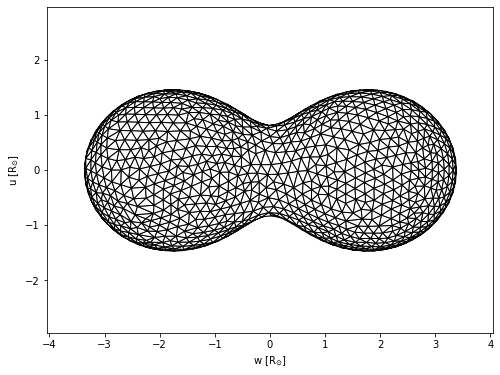

In [10]:
afig, mplfig = b['mesh01@model'].plot(x='ws', show=True)

### Orbits

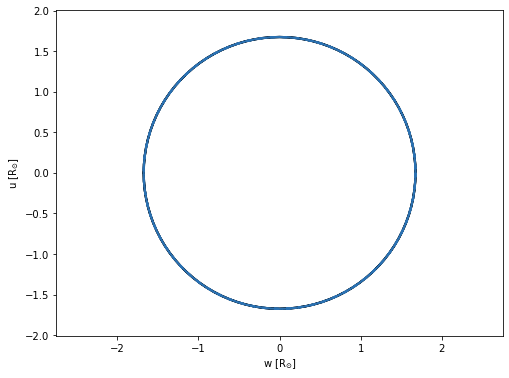

In [11]:
afig, mplfig = b['orb01@model'].plot(x='ws',show=True)

### Light Curves

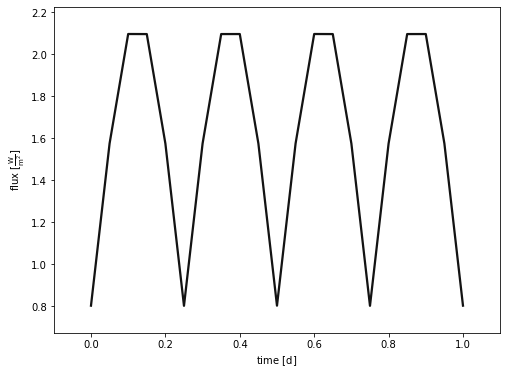

In [12]:
afig, mplfig = b['lc01@model'].plot(show=True)

### RVs

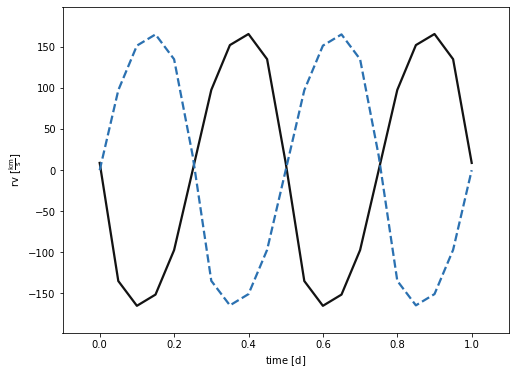

In [13]:
afig, mplfig = b['rv01@model'].plot(show=True)